### Heart disease prediction 
by: omar mohammed marey

using the heart disease data from kaggle i will build a predictive model (Classifier)

### Importing libraries and loadiing data
---


*   importing numpy, pandas, colab drive to import data from my google drive
*   importing heart disease dataframe and oxygen saturation dataframe (supplmentary dataframe)




In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [ ]:
# The Data link
# https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
heart_data = pd.read_csv('drive/MyDrive/Colab Notebooks/heart.csv')
o2_sat = pd.read_csv('drive/MyDrive/Colab Notebooks/o2Saturation.csv')
heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Exploratory analysis

---

* using describe and info to get glance of the data and data distribution
* remove duplicated rows so they don't interfere with the analysis
* ploting the data using histograms to inspect the distribution of each feature and use pairplot stratified by the outcome to see distribution of every feature of every outcome
* calculate corr and ploting them 

In [ ]:
o2_sat.describe()

,98.6
count,3585.000000
mean,98.239275
std,0.726336
min,96.500000
25%,97.600000
50%,98.600000
75%,98.600000
max,99.600000


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data = heart_data[~ heart_data.duplicated()]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44faa93150>,
      dtype=object)

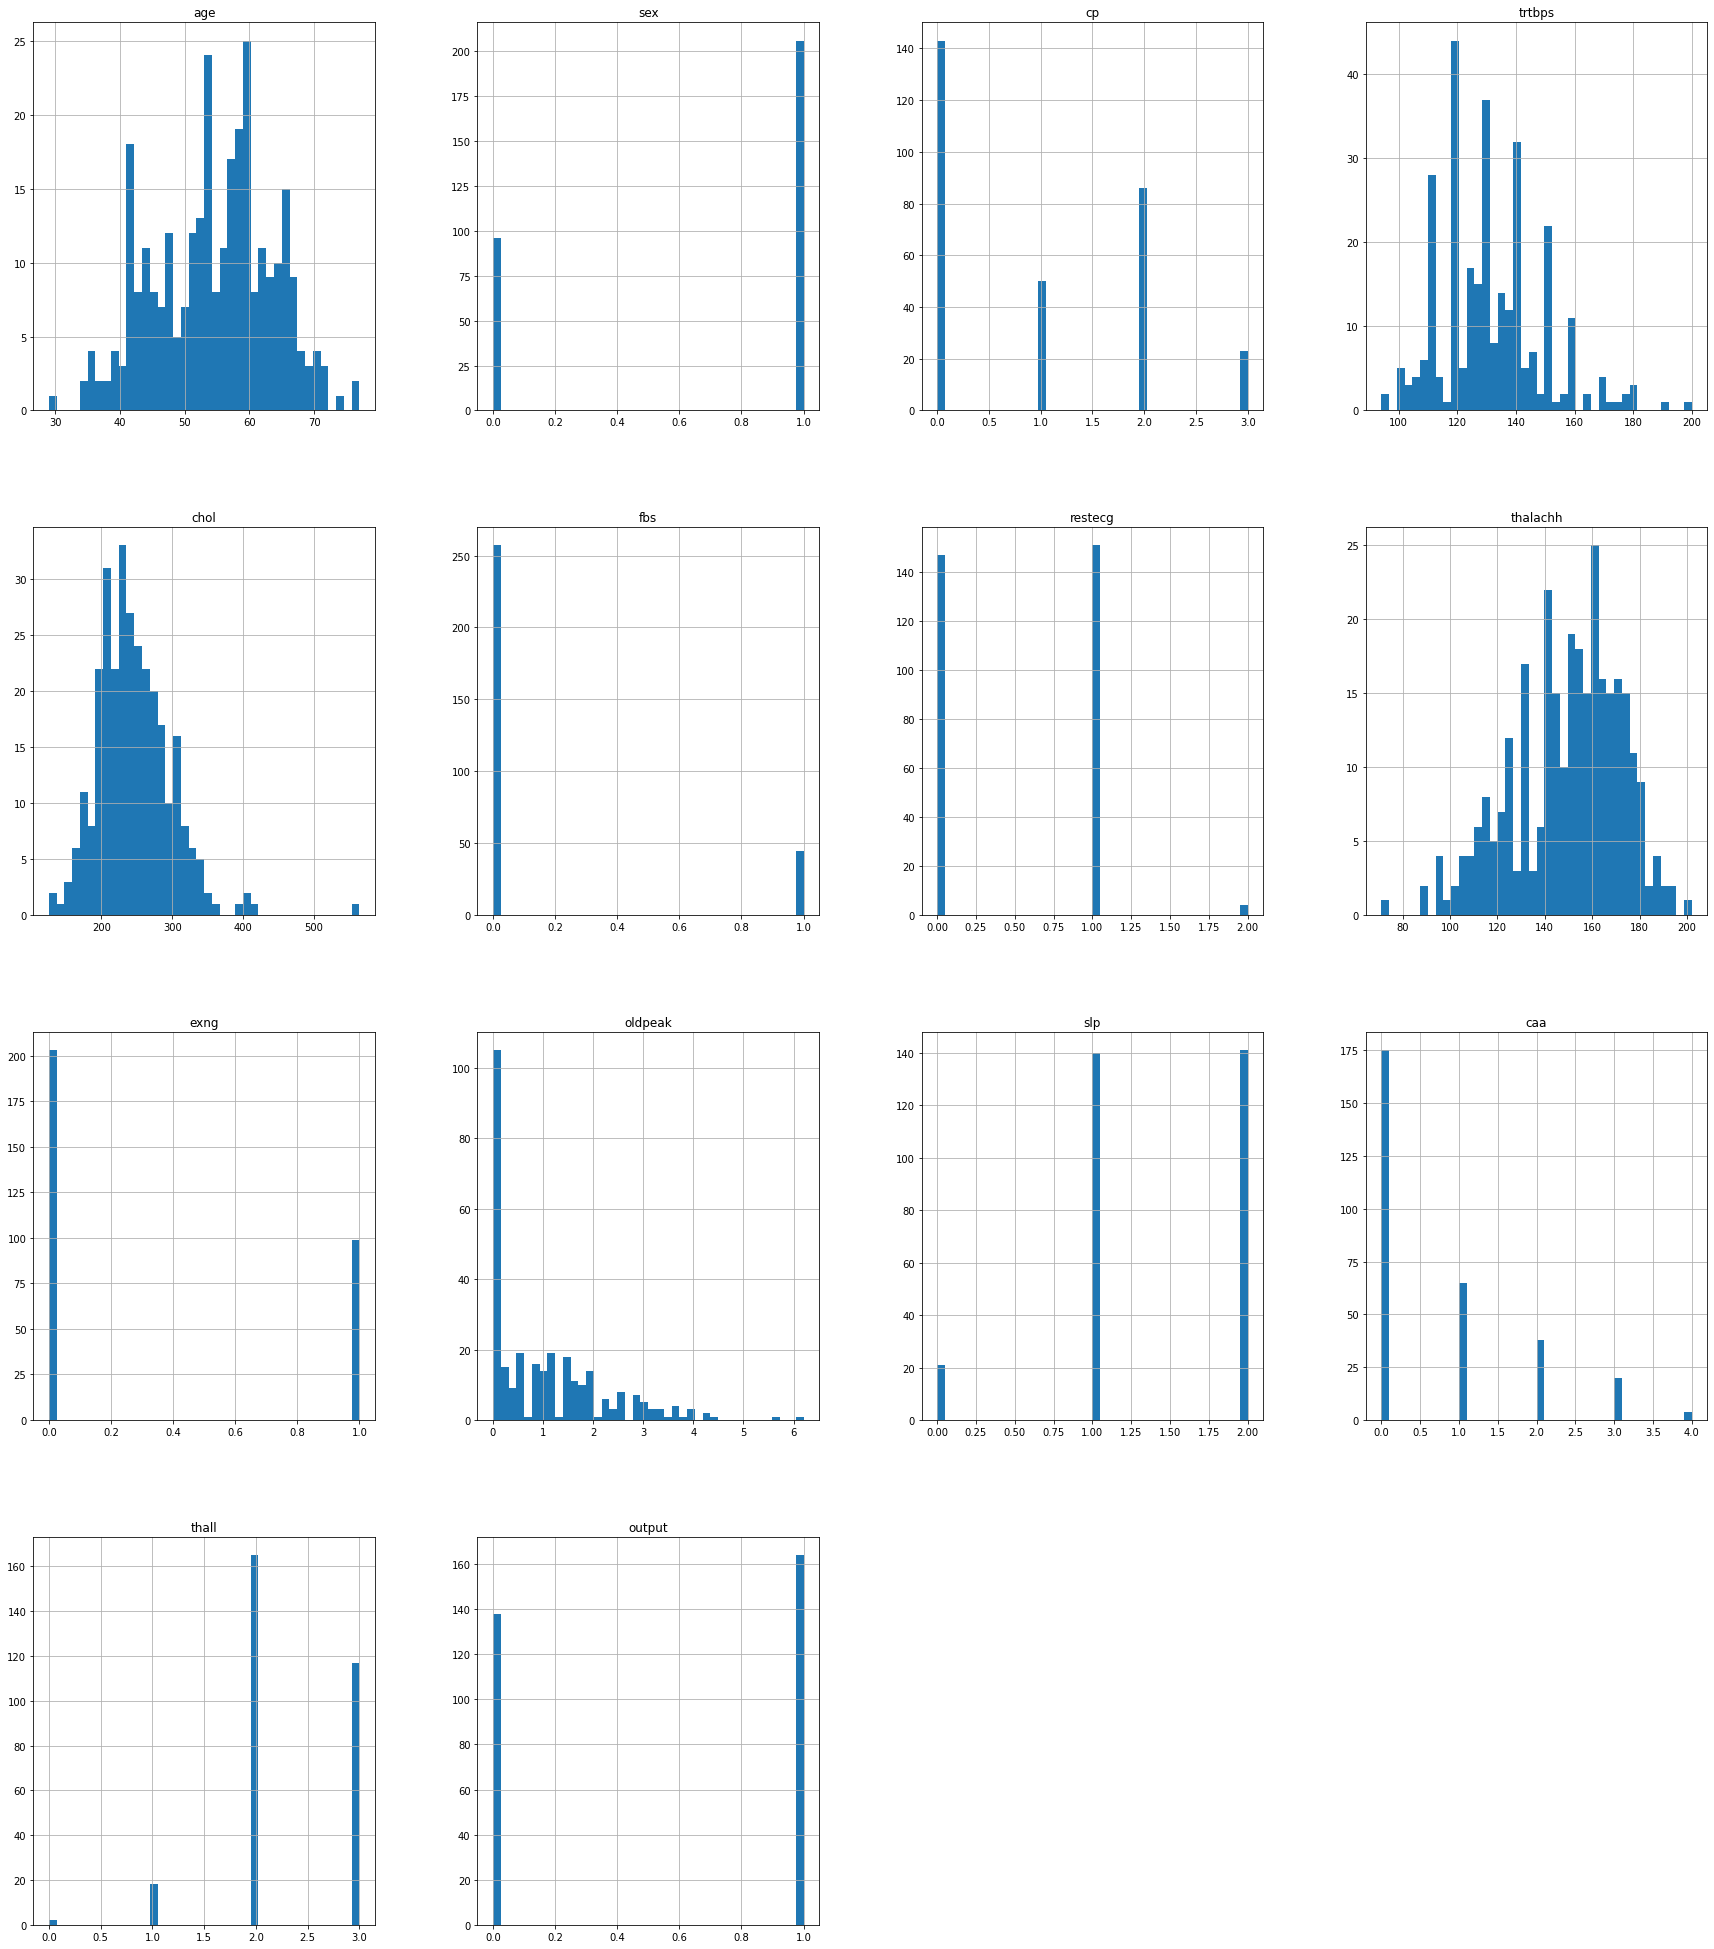

In [ ]:
heart_data.hist(bins=40,figsize=(30,35),)

Text(0.5, 1.0, 'Distribution of males and females ages')

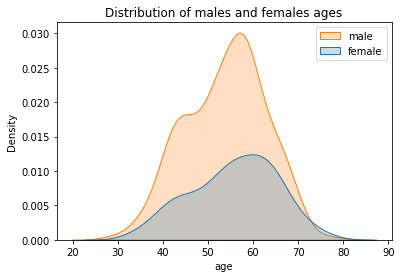

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
sns.kdeplot(heart_data.age,fill=True,hue=heart_data.sex)

plt.legend(['male','female'])
plt.title('Distribution of males and females ages')

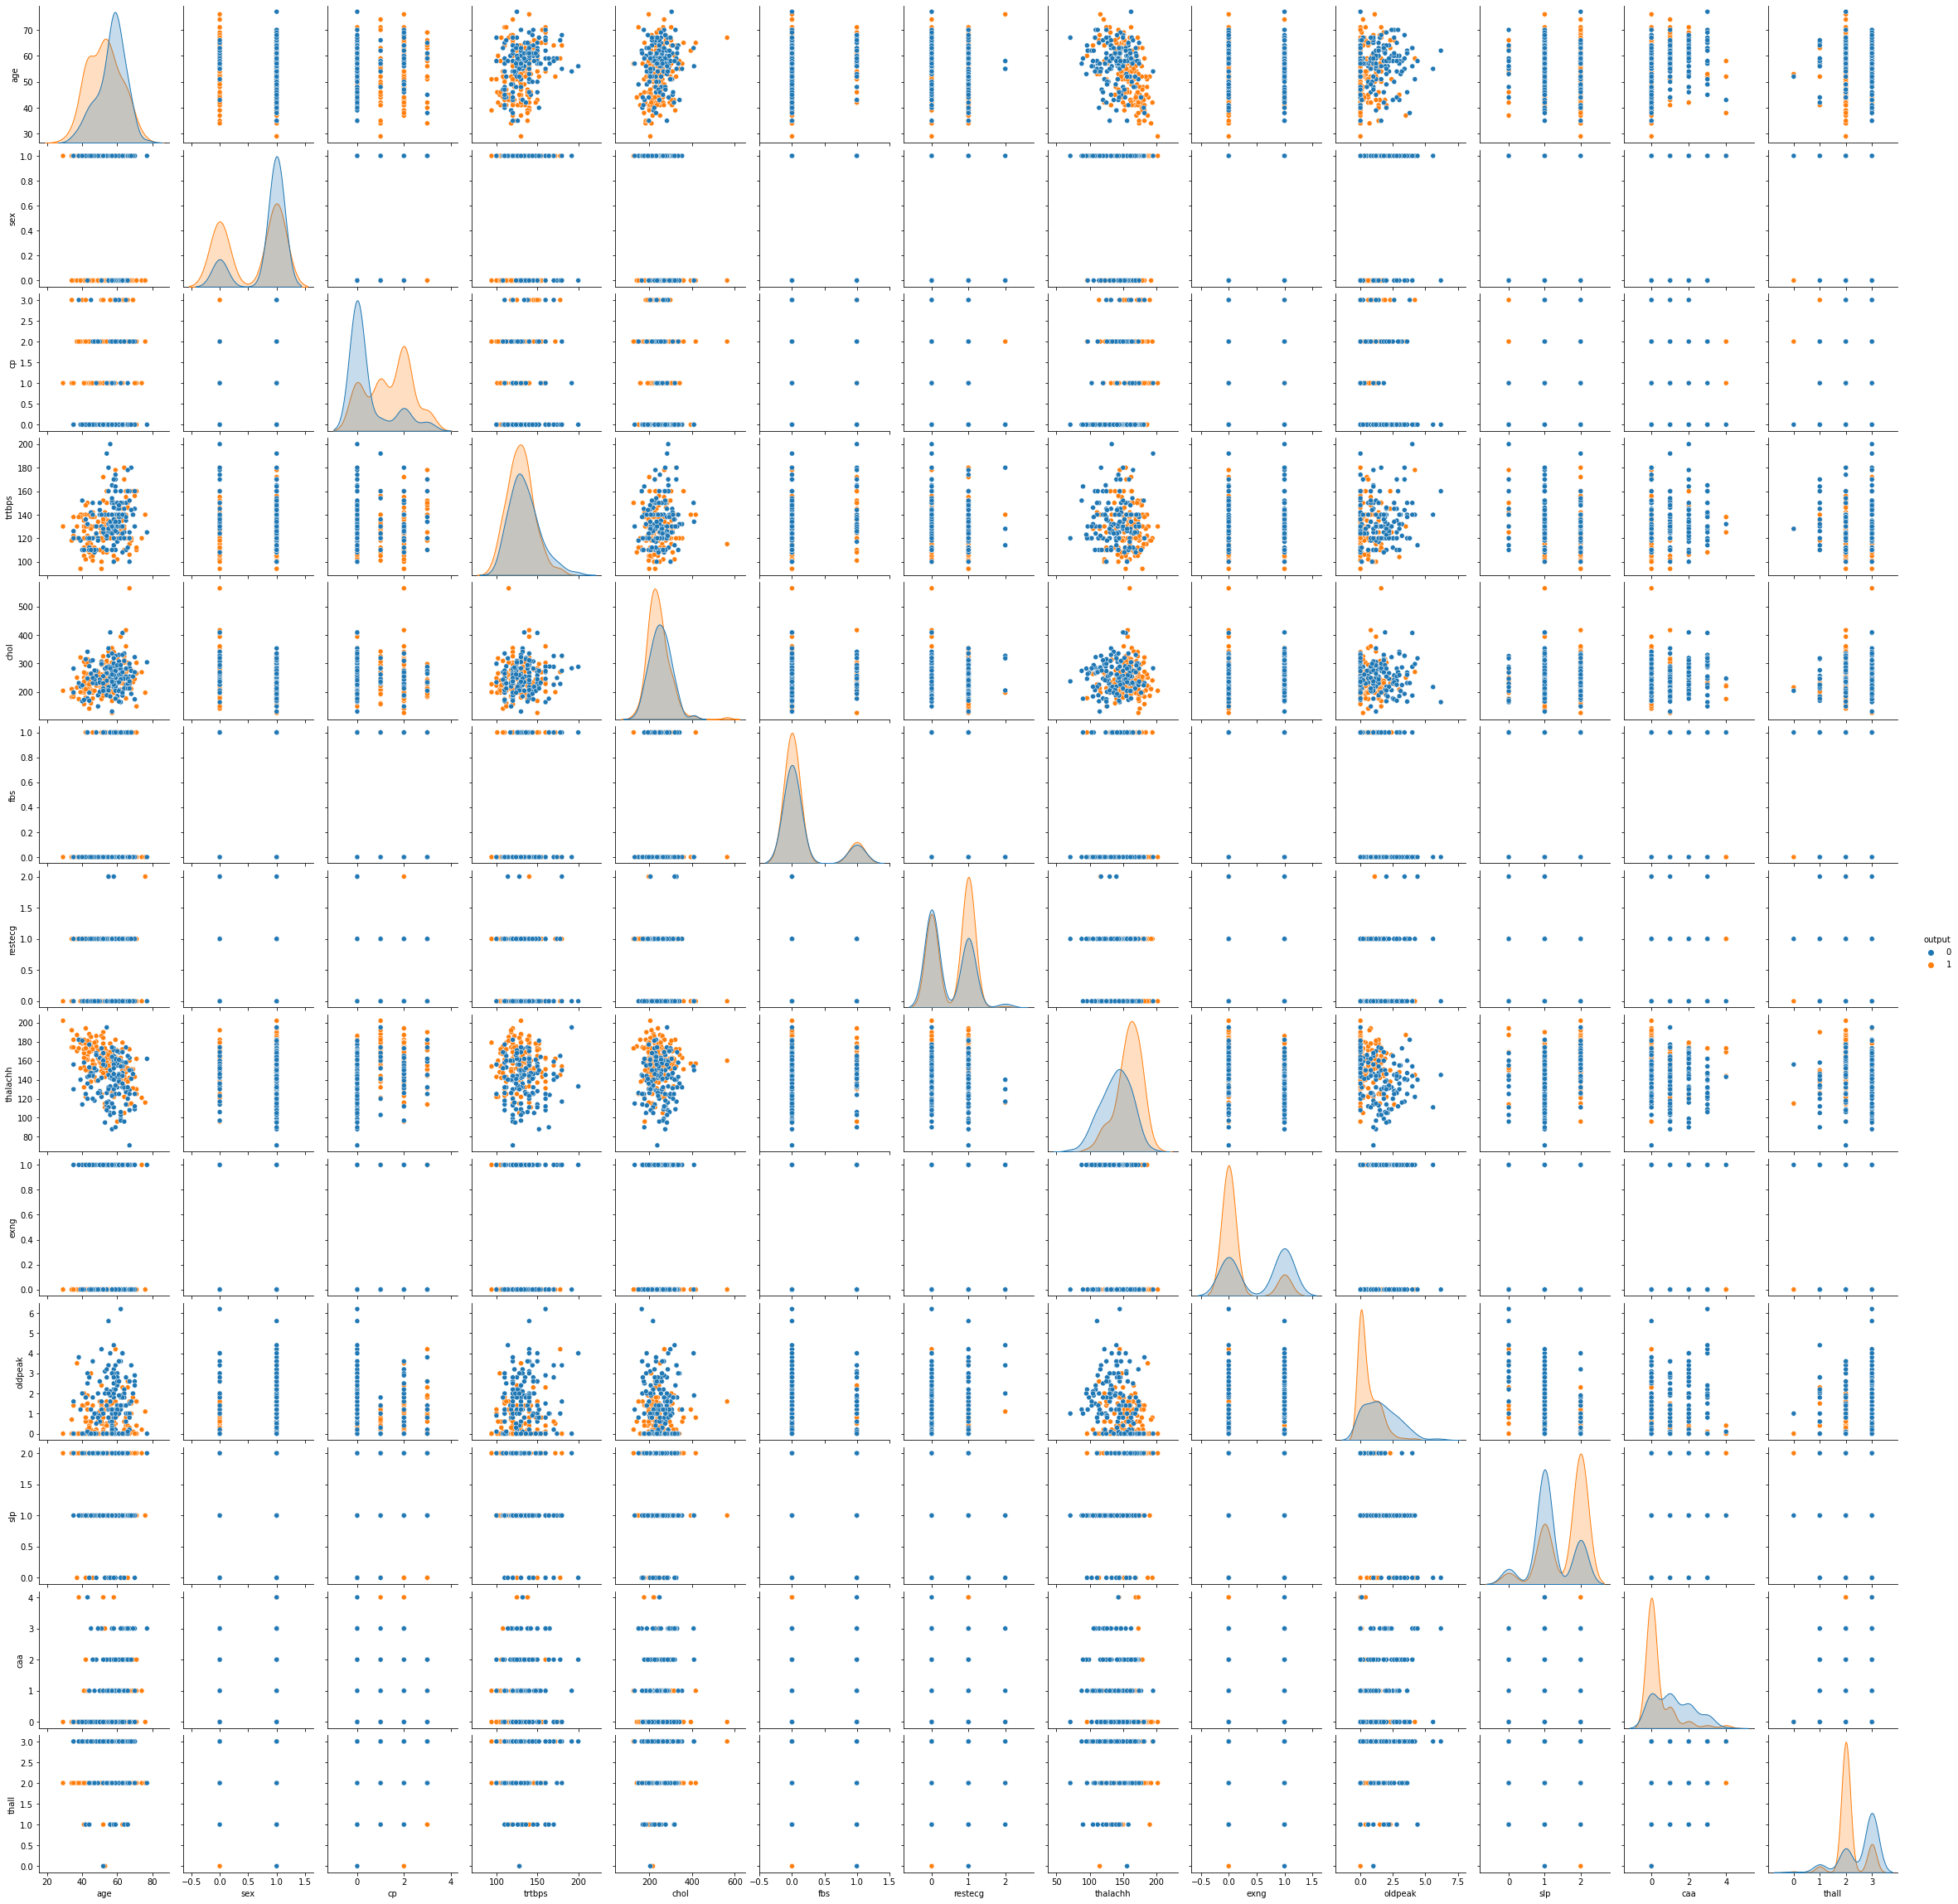

In [ ]:
sns.pairplot(heart_data,hue='output')

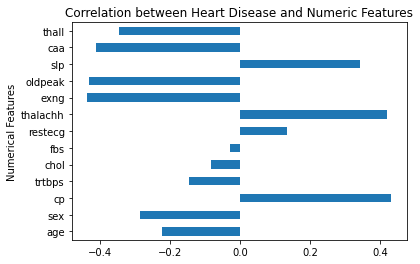

In [ ]:
heart_data.corr().output[:-1].plot(kind='barh',
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features');

### Feature engineering

---

* Create some new feature by dividing some feature ( i did to all features and those are the most relevant ones)
* create dummy feature for categorical feature

here i create some feature by dividing some of the related continuous variables 

In [ ]:


heart_data['resbp/hr'] = heart_data.trtbps / heart_data.thalachh
heart_data['peak/slope'] = (heart_data.oldpeak+1) / (heart_data.slp+1)
heart_data['hr/age'] = heart_data.thalachh / heart_data.age
heart_data['bp/age'] = heart_data.trtbps / heart_data.age
heart_data['log old'] = np.log(heart_data.oldpeak+1)



In [ ]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'age-m', 'trtbps-m',
       'chol-m', 'thalachh-m', 'oldpeak-m', 'resbp/hr', 'peak/slope', 'hr/age',
       'bp/age', 'log old'],
      dtype='object')

converting the catagorical features to dummies 

In [ ]:
categorical_features = ['fbs','sex','cp','restecg','exng','thall','caa','slp']
heart_data = pd.get_dummies(heart_data, columns = categorical_features)
heart_data

,age,trtbps,chol,thalachh,oldpeak,output,age-m,trtbps-m,chol-m,thalachh-m,...,thall_2,thall_3,caa_0,caa_1,caa_2,caa_3,caa_4,slp_0,slp_1,slp_2
0,63,145,233,150,2.3,1,8.57947,13.397351,-13.5,0.430464,...,0,0,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,-17.42053,-1.602649,3.5,37.430464,...,1,0,1,0,0,0,0,1,0,0
2,41,130,204,172,1.4,1,-13.42053,-1.602649,-42.5,22.430464,...,1,0,1,0,0,0,0,0,0,1
3,56,120,236,178,0.8,1,1.57947,-11.602649,-10.5,28.430464,...,1,0,1,0,0,0,0,0,0,1
4,57,120,354,163,0.6,1,2.57947,-11.602649,107.5,13.430464,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,2.57947,8.397351,-5.5,-26.569536,...,0,1,1,0,0,0,0,0,1,0
299,45,110,264,132,1.2,0,-9.42053,-21.602649,17.5,-17.569536,...,0,1,1,0,0,0,0,0,1,0
300,68,144,193,141,3.4,0,13.57947,12.397351,-53.5,-8.569536,...,0,1,0,0,1,0,0,0,1,0
301,57,130,131,115,1.2,0,2.57947,-1.602649,-115.5,-34.569536,...,0,1,0,1,0,0,0,0,1,0


# Modeling 



*  i import most of the models and function i 
will use in the modeling of the dataL

*    split the data to train and test (80:20) stratified by the outcome to insure even distribution in the train and test sets

*  normlize the data using standerscaler

*  i will create pipeline for every model i will use and grid search for decent hyperparameter

*  evaluate each model (best model from the grid search) using classification report which calculate accuracy and recall and precision 


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import auc, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier



y_data = heart_data.output.copy()
x_data = heart_data.drop(columns=['output']).copy()

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,stratify=y_data)

stdscaler = StandardScaler()
x_train= stdscaler.fit_transform(x_train)
x_test = stdscaler.transform(x_test)

polyf = PolynomialFeatures()
logr = LogisticRegression()

pipe_log_param = {
    'polyf__degree': [1,2,3,4],
    'logist__C': [0.00001,0.00009,0.0003,0.0009,0.001]
}

pipe_log = Pipeline([('polyf',polyf),('logist',logr)])

pipe_log_grid = GridSearchCV(pipe_log,param_grid=pipe_log_param,cv=5,n_jobs=-1,return_train_score=True)
pipe_log_grid.fit(x_train,y_train)


0.8467687074829933

In [ ]:
x_test_pred_log = pipe_log_grid.best_estimator_.predict(x_test)
print('val_acc_score :',pipe_log_grid.best_score_)
print(classification_report(x_test_pred_log,y_test))
pipe_log_grid.best_params_

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.85      0.80      0.82        35

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [ ]:

svc_param = {
    'kernel': ['poly'],
    'C':[1,5,8,9,10,15,20,30,50,100],
    'degree':[1,2,3,4,5],
    'coef0' :[0.1,0.3,.5,.8,1]
}


svc = SVC(probability=True)
svc_grid = GridSearchCV(svc,param_grid=svc_param,cv=5,n_jobs=-1)
svc_grid.fit(x_train,y_train)


0.8508503401360544


{'C': 50, 'coef0': 0.1, 'degree': 1, 'kernel': 'poly'}

In [ ]:
x_test_pred_svc = svc_grid.best_estimator_.predict(x_test)
print('val_acc_score :',svc_grid.best_score_)
print(classification_report(x_test_pred_svc,y_test))
svc_grid.best_params_

val_acc_score : 0.8508503401360544
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        23
           1       0.94      0.82      0.87        38

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



{'C': 50, 'coef0': 0.1, 'degree': 1, 'kernel': 'poly'}

In [ ]:

forest = RandomForestClassifier()

pipe_forest_param = {
    'poly__degree': [1,2,3],
    'forest__n_estimators':[200,250,100],
    'forest__max_features': ['sqrt','auto'],
    'forest__max_depth': [5,10,20],
    }

pipe_forest = Pipeline([('poly',polyf),('forest',forest)])
pipe_forest_grid = GridSearchCV(pipe_forest,param_grid=pipe_forest_param,cv=5,n_jobs=-1,return_train_score=True)
pipe_forest_grid.fit(x_train,y_train)


0.8381802721088434


{'forest__max_depth': 20,
 'forest__max_features': 'auto',
 'forest__n_estimators': 200,
 'poly__degree': 2}

In [ ]:

x_test_pred_forest = pipe_forest_grid.best_estimator_.predict(x_test)
print('val_accuracy_score :',pipe_forest_grid.best_score_)
print(classification_report(x_test_pred_forest,y_test))
pipe_forest_grid.best_params_


              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



before feature engineering
log_acc = 0.82
svc_acc = 0.80
forest_acc = 0.83

## Neural network

---
* i tried many architecture and many hyperparameter and this simple architecture outpreform the other architecture


In [ ]:
from keras import layers, optimizers,activations,models,callbacks,regularizers


nn_model = models.Sequential([
    layers.InputLayer(input_shape=x_train.shape[1],name='input'),
    layers.Dropout(rate=.2,),
    layers.Dense(512,activation='relu',kernel_initializer='lecun_normal',name='dense_1',kernel_regularizer= regularizers.l2(0.01)),
    layers.Dropout(rate=.2),
    layers.Dense(20,activation='relu',kernel_initializer= 'lecun_normal',name='dense_2',kernel_regularizer= regularizers.l2(0.01)),
    layers.Dropout(rate=0.2),
#     layers.Dense(20,activation='selu',kernel_initializer='he_normal',name='dense_3',kernel_regularizer= regularizers.l2(0.001)),
#     layers.Dense(20,activation='selu',kernel_initializer='he_normal',name='dense_4',kernel_regularizer= regularizers.l2(0.001)),
#     layers.Dense(20,activation='selu',kernel_initializer='lecun_normal',name='dense_53',kernel_regularizer= regularizers.l2(0.001)),


    layers.Dense(1,activation='sigmoid',name='output')
    
])

nn_model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
lr_performance = callbacks.ReduceLROnPlateau(factor=0.5,patience=5)
early_stoping = callbacks.EarlyStopping(patience=30,restore_best_weights=True)

history= nn_model.fit(x_train,y_train,epochs=200,validation_split=.2,callbacks=[lr_performance,early_stoping],shuffle=True)

Epoch 1/200
6/6 [==============================] - 1s 41ms/step - loss: 5.9735 - accuracy: 0.6198 - val_loss: 5.6227 - val_accuracy: 0.7959 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 5.4893 - accuracy: 0.8281 - val_loss: 5.3658 - val_accuracy: 0.8163 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 5.2662 - accuracy: 0.8490 - val_loss: 5.1553 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 5.0481 - accuracy: 0.8177 - val_loss: 4.9500 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 4.8268 - accuracy: 0.8281 - val_loss: 4.7374 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 4.5581 - accuracy: 0.8698 - val_loss: 4.5298 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 4.4170 - accur

In [ ]:
def build_nn():  
    nn_model = models.Sequential([
        layers.InputLayer(input_shape=x_train.shape[1],name='input'),
        layers.Dropout(rate=.2,),
        layers.Dense(512,activation='relu',kernel_initializer='lecun_normal',name='dense_1',kernel_regularizer= regularizers.l2(0.01)),
        layers.Dropout(rate=.2),
        layers.Dense(20,activation='relu',kernel_initializer= 'lecun_normal',name='dense_2',kernel_regularizer= regularizers.l2(0.01)),
        layers.Dropout(rate=0.2),
    #     layers.Dense(20,activation='selu',kernel_initializer='he_normal',name='dense_3',kernel_regularizer= regularizers.l2(0.001)),
    #     layers.Dense(20,activation='selu',kernel_initializer='he_normal',name='dense_4',kernel_regularizer= regularizers.l2(0.001)),
    #     layers.Dense(20,activation='selu',kernel_initializer='lecun_normal',name='dense_53',kernel_regularizer= regularizers.l2(0.001)),


        layers.Dense(1,activation='sigmoid',name='output')

    ])

    nn_model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
    return nn_model

here i use wrapper to make the NN model used in sklearn classes and methods to put the model in ensembel with the other models

In [ ]:

import tensorflow as tf
keras_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(
                            build_nn,
                            epochs=500,
                            verbose=False)
keras_clf._estimator_type = "classifier"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
pred = nn_model.predict(x_test)>0.5
accuracy_score(pred,y_test)

0.8524590163934426

In [ ]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(x_train,y_train)
lgb_pred = lgb_clf.predict(x_test)
print(classification_report(lgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78        21
           1       0.94      0.78      0.85        40

    accuracy                           0.82        61
   macro avg       0.81      0.84      0.81        61
weighted avg       0.85      0.82      0.82        61



## Ensembling

here i use soft voting classifier to combine all the model i made 
and it produce the best result with accuracy 87%

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

voter = VotingClassifier([("nn",keras_clf),('log',pipe_log_grid.best_estimator_),('forest',pipe_forest_grid.best_estimator_),('svc',svc_grid.best_estimator_),('lgb',lgb_clf)]
                        ,voting='soft',
             flatten_transform=True)
voter.fit(x_train,y_train)
voter.score(x_test,y_test)

0.8852459016393442

In [ ]:
print(classification_report(voter.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       0.91      0.86      0.88        35

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

